In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
gpus = tf.config.list_physical_devices('GPU')
gpus

I0000 00:00:1721479943.709812     708 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721479943.856078     708 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721479943.856114     708 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    ## the memory of the GPU is allocated dinamically to the model instead of the default option
    ## in which TensorFlow allocates all the memory to the GPU dirrectly

In [4]:
data = tf.keras.utils.image_dataset_from_directory(
    '/mnt/c/Users/Sebastian/Downloads/MNISTasJPG',
    image_size=(28, 28),  
    batch_size=32,        
    label_mode='int'     
)

Found 42000 files belonging to 10 classes.


I0000 00:00:1721479963.368715     708 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721479963.368753     708 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721479963.368761     708 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721479964.002476     708 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721479964.002520     708 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [5]:
path = '/mnt/c/Users/Sebastian/Downloads/testSet'
print(os.path.exists(path))
print(os.listdir(path))

True
['img_1.jpg', 'img_10.jpg', 'img_100.jpg', 'img_1000.jpg', 'img_10000.jpg', 'img_10001.jpg', 'img_10002.jpg', 'img_10003.jpg', 'img_10004.jpg', 'img_10005.jpg', 'img_10006.jpg', 'img_10007.jpg', 'img_10008.jpg', 'img_10009.jpg', 'img_1001.jpg', 'img_10010.jpg', 'img_10011.jpg', 'img_10012.jpg', 'img_10013.jpg', 'img_10014.jpg', 'img_10015.jpg', 'img_10016.jpg', 'img_10017.jpg', 'img_10018.jpg', 'img_10019.jpg', 'img_1002.jpg', 'img_10020.jpg', 'img_10021.jpg', 'img_10022.jpg', 'img_10023.jpg', 'img_10024.jpg', 'img_10025.jpg', 'img_10026.jpg', 'img_10027.jpg', 'img_10028.jpg', 'img_10029.jpg', 'img_1003.jpg', 'img_10030.jpg', 'img_10031.jpg', 'img_10032.jpg', 'img_10033.jpg', 'img_10034.jpg', 'img_10035.jpg', 'img_10036.jpg', 'img_10037.jpg', 'img_10038.jpg', 'img_10039.jpg', 'img_1004.jpg', 'img_10040.jpg', 'img_10041.jpg', 'img_10042.jpg', 'img_10043.jpg', 'img_10044.jpg', 'img_10045.jpg', 'img_10046.jpg', 'img_10047.jpg', 'img_10048.jpg', 'img_10049.jpg', 'img_1005.jpg', 'img_1

In [6]:
import glob
test_data_path = '/mnt/c/Users/Sebastian/Downloads/testSet'

image_paths = glob.glob(os.path.join(test_data_path, '*.jpg'))
## glob is used in order to select all the images with the help of the wildcard * 

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3) ## transforms the image into a tensor object with sizes
                                                    ## no_pixels_height X no_pixels_width X 3
    image = tf.image.resize(image, [28, 28]) ## resizes the tensor into a 28 X 28 X 3 tensor using interpolation
                                             ## which takes a number of neighbouring pixels and computes the mean 
                                             ## in order to get the new pixels value
    image = image / 255.0
    return image

path_ds = tf.data.Dataset.from_tensor_slices(image_paths) ## takes each image path and creates a dataset
                                                          ## in which each path is its own individual object

image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
## applies the preprocess_image function to each of the image taken before and the last part is for optimization

batch_size = 32
test_data = image_ds.batch(batch_size)

test_data = test_data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE) ## preload the next batch while
                                                                          ## working on the current one

In [7]:
def preprocess(image, label):
    image = image / 255.0
    label = tf.keras.utils.to_categorical(label, num_classes=10) ## label is an integer between 0 and 9
    return image, label

data = data.map(preprocess)

In [8]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0][0]
## batch -> the entire batch of images
## batch[0] -> the first image of the batch
## batch[0][0] -> the first row of pixels

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [9]:
len(data)

1313

In [10]:
train_size = int(len(data)*.8)
val_size = int(len(data) *.2)

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Input(shape = (28, 28, 3)))
model.add(Conv2D(2, (5,5), 1), activation = 'relu'))

In [13]:
model = Sequential()
## The base of the model, sequential means the layers are added on top of each others, and not branched
## the output of each layer is the input of the next one
model.add(Input(shape=(28, 28, 3)))
## The inputs are 28 X 28 X 3 tensors -> 28X28 images on 3 channels
model.add(Conv2D(16, (3, 3), activation='relu',input_shape=(28, 28, 3), kernel_regularizer=l2(0.001)))
## The first layer is a convolution layer with 16 filters sixed 3X3 and use an l2 kernel_regularizer
## the l2 kernel regularizer penalizes the total amount of loss in order for the model to use more general weights:
## New loss = old Loss + lambda * sum(weights^2)
model.add(MaxPooling2D((2, 2)))
### this max pooling layer takes the max values of 2X2 portions of the convolved feautures
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
## same as above but 32 filters
model.add(MaxPooling2D((2, 2)))
## same as above
model.add(Flatten())
## the flatten layer takes all of the convolved and max pooled features from before and makes them like a linear
## layer of neurons
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
## this is a normal layer with 64 neurons
model.add(Dropout(0.5))
## a half of the neurons are turned off randomly in order to avoid overfitting
model.add(Dense(10, activation='softmax'))
## this is the output layer which uses the softmax function which turns each output
## and transforms it into a probability

/home/sebastian/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile('adam',loss=tf.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,002 (222.66 KB)

 Trainable params: 57,002 (222.66 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
logdir = 'logs'

In [17]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [18]:
hist = model.fit(train,epochs = 4, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/4


I0000 00:00:1721479965.603477     949 service.cc:146] XLA service 0x7f0474004890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721479965.603501     949 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9


  41/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2394 - loss: 2.2635

I0000 00:00:1721479967.440846     949 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 46ms/step - accuracy: 0.7619 - loss: 0.8530 - val_accuracy: 0.9690 - val_loss: 0.2132
Epoch 2/4
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.9431 - loss: 0.3017 - val_accuracy: 0.9790 - val_loss: 0.1715
Epoch 3/4
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.9534 - loss: 0.2566 - val_accuracy: 0.9819 - val_loss: 0.1545
Epoch 4/4
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9596 - loss: 0.2255 - val_accuracy: 0.9838 - val_loss: 0.1443


In [19]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [20]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [21]:
predictions = []

for batch in test_data.as_numpy_iterator():
    X = batch 
    yhat = model.predict(X)
    predictions.append(yhat)

predictions = np.concatenate(predictions, axis=0)

predictions = np.array(predictions)

predicted_digits = np.argmax(predictions, axis=1)

print(predicted_digits)

print(f"Predictions shape: {predictions.shape}")

print(predictions[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

In [22]:
import cv2

In [23]:
def is_greyscale_image(image_path):
    img = cv2.imread(image_path)
    if len(img.shape) == 2:
        return True
    elif len(img.shape) == 3 and img.shape[2] == 1:
        return True
    else:
        return False

image_path = '/mnt/c/Users/Sebastian/Downloads/8image.jpg' 
is_greyscale = is_greyscale_image(image_path)
print(f"Is the image grayscale? {'Yes' if is_greyscale else 'No'}")

Is the image grayscale? No


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
The predicted digit is: 1


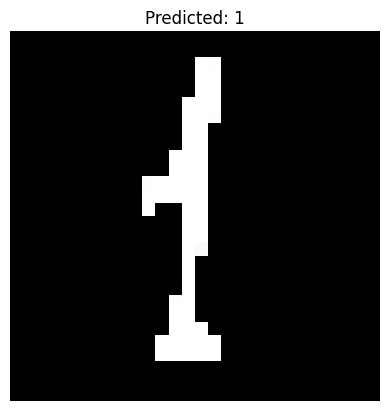

In [40]:
def load_and_preprocess_image_cv2(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    return img

def predict_digit_cv2(image_path):
    image = load_and_preprocess_image_cv2(image_path)
    
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image)
    
    predicted_digit = np.argmax(prediction, axis=1)[0]
    
    return predicted_digit

new_image_path = '/mnt/c/Users/Sebastian/Downloads/8image.jpg' 

predicted_digit = predict_digit_cv2(new_image_path)

print(f"The predicted digit is: {predicted_digit}")

image = load_and_preprocess_image_cv2(new_image_path)
plt.imshow(image)
plt.title(f"Predicted: {predicted_digit}")
plt.axis("off")
plt.show()

In [41]:
model.save(os.path.join('../models','convnet_digit_rec.h5'))